# Project 2 - Generalized Linear Models with Quasi-Newton Methods

## Yan Bo Zeng

In [2]:
library(dplyr)
library(repr)
options(repr.plot.width = 12, repr.plot.height = 10)
options(scipen = 999)

# 1. Ordinary Least Squares

Recall the ordinary least squares model $y_i = x_i'\beta + \epsilon_i$. The maximum likelihood estimator (MLE) for the coefficient parameter $\beta$ is
\begin{align*}
    \hat{\beta} & = \arg\max_{\beta \in \mathbb{R}^k} -\frac{1}{2n} \sum_{i=1}^{n} \left(y_i - x_i'\beta \right)^2 \\
    & = \arg\min_{\beta \in \mathbb{R}^k} \frac{1}{2n} \sum_{i=1}^{n} \left(y_i - x_i'\beta \right)^2
\end{align*}

Denote $\frac{1}{2n} \sum_{i=1}^{n} \left(y_i - x_i'\beta \right)^2 = Q(\beta)$, $X$ as the model matrix including the intercept term, and $Y$ as the outcome vector. Then, the gradient is
\begin{align*}
    \nabla Q(\beta) & = \frac{\partial}{\partial\beta} Q(\beta) \\
    & = -\frac{1}{n} \sum_{i=1}^{n} \left(y_i - x_i'\beta \right)x_i \\
    & = -\frac{1}{n} X'\left(Y - X\beta \right)
\end{align*}

The Hessian is
\begin{align*}
    \nabla^2 Q(\beta) & = H(\beta)$ \\
    & = 
\end{align*}

In [ ]:
#Define the cost, gradient, and Hessian functions for OLS.
OLS_cost <- function(X, y, beta) {
    return(mean((y - X %*% beta)^2) / 2)
}

OLS_gradient <- function(X, y, beta) {
    return(-t(X) %*% (y - X %*% beta) / length(y))
}

OLS_hessian <- function(X, y, beta) {
    return(-t(X) %*% (y - X %*% beta) / length(y))
}

### Gradient Descent
Given a learning rate $\alpha_t$, gradient descent will iterate on
\begin{align*}
    \hat{\beta}_{t+1} & = \hat{\beta}_{t} - \alpha_t \nabla Q(\hat{\beta}_{t}) \\
    & = \hat{\beta}_{t} + \alpha_t \frac{1}{n} X'\left(Y - X\hat{\beta}_{t} \right)
\end{align*}

### Newton


### Quasi-Newton

In [4]:
#Define the gradient descent function.
gradient_descent <- function(X, y, beta_init = rep(0, ncol(X)), alpha = 0.01, num_iters = 2*10^4,
                             error_func = OLS_cost, grad_func = OLS_gradient, linesearch = FALSE, linesearch_c = 0.1) {
    
    #Record errors (cost values) from each iteration.
    error_history <- rep(0, num_iters)
    
    #Initialize beta.
    beta <- beta_init
    
    #Record alpha for line search.
    alpha_init <- alpha
    
    #Implement gradient descent.
    for (i in 1:num_iters) {
        error_old <- error_func(X, y, beta)
        delta <- grad_func(X, y, beta)
        beta <- beta - alpha * delta
        
        #Implement backtracking line search.
        if (linesearch == TRUE) {
            while (error_func(X, y, beta) > (error_old - linesearch_c*alpha*(norm(delta)^2))) {
                error_old <- error_func(X, y, beta)
                alpha = alpha / 2
                delta <- grad_func(X, y, beta)
                beta <- beta - alpha * delta
            }
            alpha <- alpha_init
        }
        
        error_history[i] <- error_func(X, y, beta)
    }
    
    #Return the history for plotting.
    return(list(beta, error_history))
}

## Test the algorithm on orange juice advertisement data.
Firstly, we can use the R built-in glm() package to obtain a robust estimate of the coefficients.

In [5]:
oj <- read.csv("C:/Users/yanbo/OneDrive/Stanford MS&E 311 Optimization/oj.csv")
X <- model.matrix(log(sales) ~ log(price) + brand, data = oj)
y <- log(oj$sales)

builtin <- glm(log(sales) ~ log(price) + brand, data = oj)
coef(builtin) %>% as.matrix()

(Intercept),10.8288216
log(price),-3.1386914
brandminute.maid,0.8701747
brandtropicana,1.5299428


In [ ]:
betalist_ls <- gradient_descent(X, y, alpha = 2, linesearch = TRUE)

display <- cbind(betalist001[[1]], betalist01[[1]], betalist04[[1]], betalist2[[1]], betalist_ls[[1]])
colnames(display) <- c("alpha = 0.01", "alpha = 0.1", "alpha = 0.4", "alpha = 2", "alpha = 2, line search")
display

Then, we can try different learning rates or use line search to find an effective one.

In [5]:
betalist001 <- gradient_descent(X, y)
betalist01 <- gradient_descent(X, y, alpha = 0.1)
betalist04 <- gradient_descent(X, y, alpha = 0.4)
betalist2 <- gradient_descent(X, y, alpha = 2)
betalist_ls <- gradient_descent(X, y, alpha = 2, linesearch = TRUE)

display <- cbind(betalist001[[1]], betalist01[[1]], betalist04[[1]], betalist2[[1]], betalist_ls[[1]])
colnames(display) <- c("alpha = 0.01", "alpha = 0.1", "alpha = 0.4", "alpha = 2", "alpha = 2, line search")
display

,alpha = 0.01,alpha = 0.1,alpha = 0.4,alpha = 2,"alpha = 2, line search"
(Intercept),10.8104335,10.8288216,10.8288216,NaN,10.8288216
log(price),-3.1016483,-3.1386914,-3.1386914,NaN,-3.1386914
brandminute.maid,0.8583812,0.8701747,0.8701747,NaN,0.8701747
brandtropicana,1.5083747,1.5299428,1.5299428,NaN,1.5299428


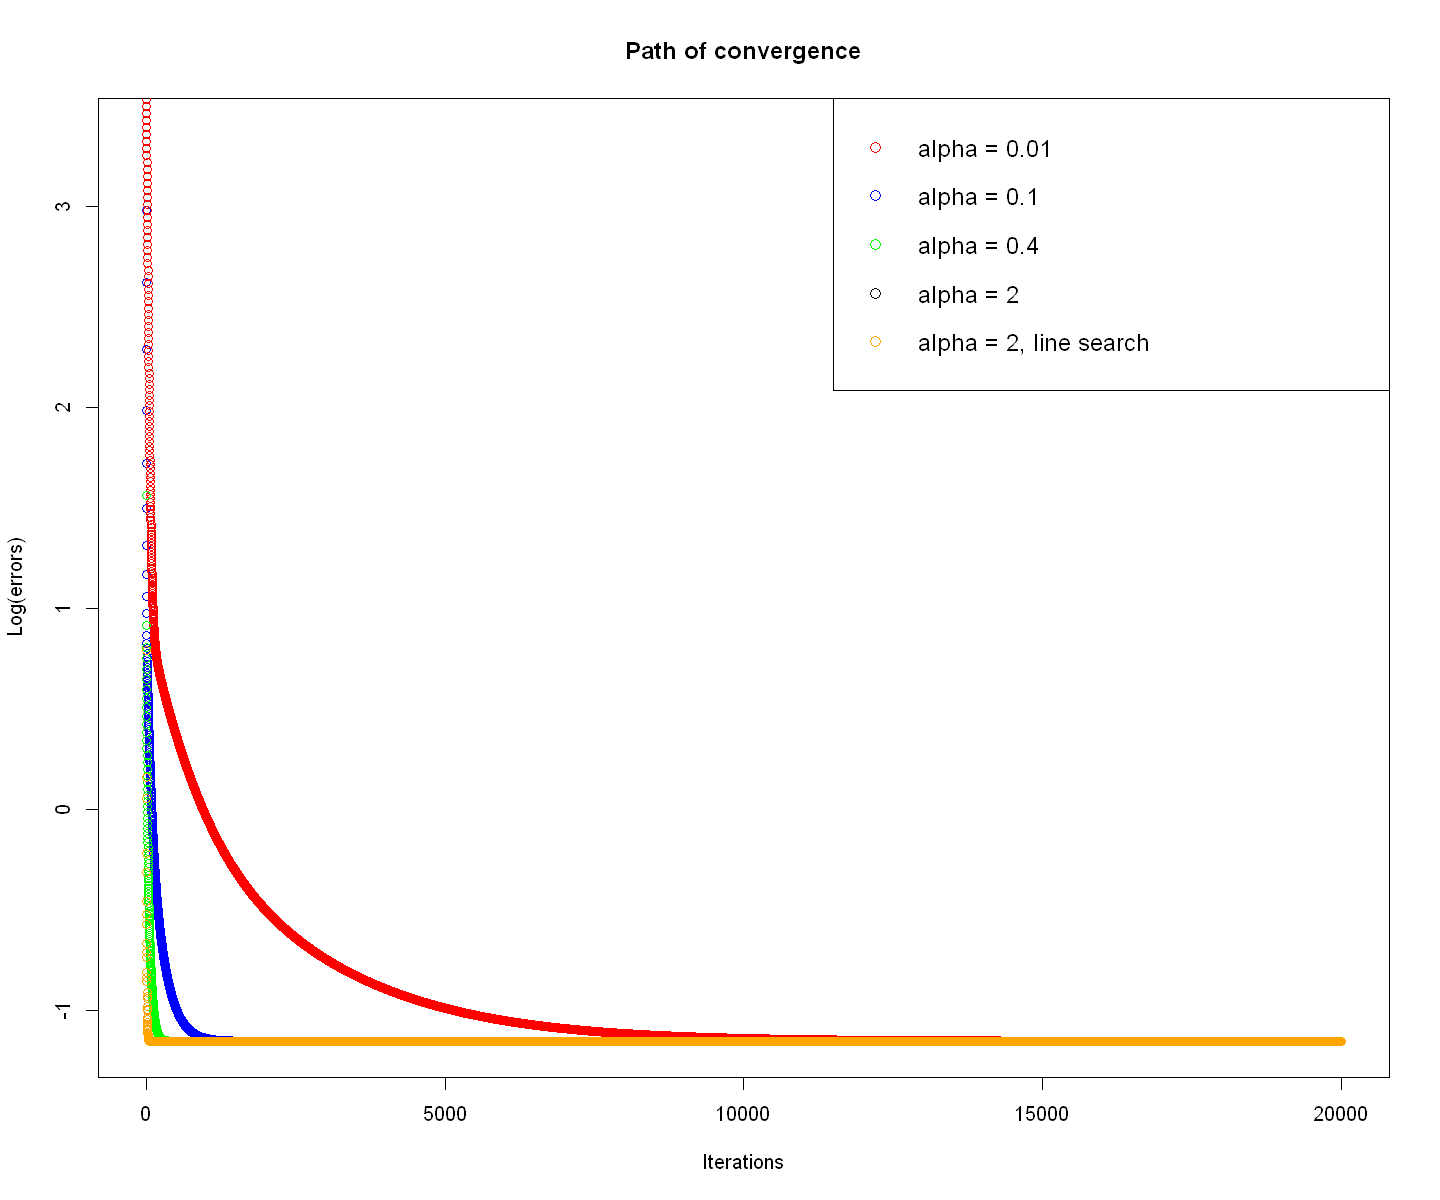

In [6]:
#Visualize the path of convergence.
plot(log(betalist01[[2]]), col = 'blue', main = 'Path of convergence', ylab = 'Log(errors)', xlab = 'Iterations')
points(log(betalist001[[2]]), col = 'red')
points(log(betalist04[[2]]), col = 'green')
points(log(betalist2[[2]]), col = 'black')
points(log(betalist_ls[[2]]), col = 'orange')
legend("topright", legend = c("alpha = 0.01", "alpha = 0.1", "alpha = 0.4", "alpha = 2", "alpha = 2, line search"),
       col = c("red", "blue", "green", "black", "orange"), bty = "o", pch = 1, cex = 1.2)

Here, using a learning rate of $0.01$ results in slow convergence, and therefore $\hat{\beta}$ cannot converge to the "correct" values within $20,000$ iterations. While learning rates of $0.1$ and $0.4$ perform very well, a learning rate of $2$ is too large, causing the algorithm to diverge and return NAs for all coefficients. On the other hand, the orange curve shows that line search is really helpful in finding a decent $\alpha_t$ for fast convergence and preventing the algorithm from blowing up.

# 2. Logistic and Probit Regressions

Recall that in logit and probit models, $\hat{\beta}$ is obtained by maximizing the log-likelihood function or equivalently minimizing the cross-entropy loss function.
\begin{align*}
    \hat{\beta} & = \arg\max_{\beta \in \mathbb{R}^k} \prod_{i=1}^{n} F(x_i'\beta)^{y_i} \left(1 - F(x_i'\beta) \right)^{1-y_i} \\
    & = \arg\min_{\beta \in \mathbb{R}^k} -\log{\left( \prod_{i=1}^{n} F(x_i'\beta)^{y_i} \left(1 - F(x_i'\beta) \right)^{1-y_i} \right)} \\
    & = \arg\min_{\beta \in \mathbb{R}^k} -\frac{1}{n} \sum_{i=1}^{n} \left(y_i\log{F(x_i'\beta)} + (1-y_i)\log{\left(1 - F(x_i'\beta) \right)} \right)
\end{align*}

Denote $-\frac{1}{n} \sum_{i=1}^{n} \left(y_i\log{F(x_i'\beta)} + (1-y_i)\log{\left(1 - F(x_i'\beta) \right)} \right) = Q(\beta)$. Then, the gradient is
\begin{align*}
    \nabla Q(\beta) & = \frac{\partial}{\partial\beta} Q(\beta) \\
    & = -\frac{1}{n} \sum_{i=1}^{n} \left(\frac{y_i}{F(x_i'\beta)} - \frac{1-y_i}{1-F(x_i'\beta)} \right) f(x_i'\beta)x_i \\
    & = -\frac{1}{n} \sum_{i=1}^{n} \frac{y_i-F(x_i'\beta)}{F(x_i'\beta) \left(1-F(x_i'\beta)\right)} f(x_i'\beta)x_i
\end{align*}

For logit, $F(x_i'\beta) = \frac{\exp{x_i'\beta}}{1+\exp{x_i'\beta}}$, and $f(x_i'\beta) = \left(\frac{\exp{x_i'\beta}}{1+\exp{x_i'\beta}} \right) \left(1 - \frac{\exp{x_i'\beta}}{1+\exp{x_i'\beta}} \right) = F(x_i'\beta) \left(1-F(x_i'\beta)\right)$.

For probit, $F(x_i'\beta) = \Phi(x_i'\beta)$, and $f(x_i'\beta) = \phi(x_i'\beta)$, where $\Phi(\cdot)$ and $\phi(\cdot)$ are the standard normal CDF and PDF, respectively.

In [9]:
#Define the cost and gradient functions for logit.
logit_cost <- function(X, y, beta) {
    return(-mean(y*log(exp(X%*%beta)/(1+exp(X%*%beta))) + (1-y)*log(1-exp(X%*%beta)/(1+exp(X%*%beta)))))
}

logit_gradient <- function(X, y, beta) {
    return(-t(X) %*% (y - exp(X%*%beta)/(1 + exp(X%*%beta))) / length(y))
}

## Test the algorithm for logit on synthetic data.

In [10]:
set.seed(888)
n <- 10000
y <- runif(n) > 0.4
X <- cbind(Intercept = rep(1, n), x1 = rnorm(n, 0, 2), x2 = runif(n, -2, 1), x3 = rnorm(n, 4, 1), x4 = rnorm(n, -3, 5))
data <- data.frame(y, X)

builtin <- glm(y ~ x1 + x2 + x3 + x4, data = data, family = binomial(link = "logit"))
coef(builtin) %>% as.matrix()

(Intercept),0.4161762124
x1,0.0090180079
x2,-0.0318122563
x3,-0.0014710907
x4,0.0008547123


In [9]:
betalist001 <- gradient_descent(X, y, error_func = logit_cost, grad_func = logit_gradient)
betalist01 <- gradient_descent(X, y, alpha = 0.1, error_func = logit_cost, grad_func = logit_gradient)
betalist04 <- gradient_descent(X, y, alpha = 0.4, error_func = logit_cost, grad_func = logit_gradient)
betalist08 <- gradient_descent(X, y, alpha = 0.8, error_func = logit_cost, grad_func = logit_gradient)
betalist_ls <- gradient_descent(X, y, alpha = 0.8, linesearch = TRUE, linesearch_c = 0.3,
                                error_func = logit_cost, grad_func = logit_gradient)

display <- cbind(betalist001[[1]], betalist01[[1]], betalist04[[1]], betalist08[[1]], betalist_ls[[1]])
colnames(display) <- c("alpha = 0.01", "alpha = 0.1", "alpha = 0.4", "alpha = 0.8", "alpha = 0.8, line search")
display

,alpha = 0.01,alpha = 0.1,alpha = 0.4,alpha = 0.8,"alpha = 0.8, line search"
Intercept,0.3849996501,0.4161762124,0.36384440,0.48927135,0.4161762121
x1,0.0091000374,0.0090180079,0.01458780,0.02144048,0.0090180079
x2,-0.0330762659,-0.0318122563,-0.03679878,-0.06163636,-0.0318122561
x3,0.0055857081,-0.0014710907,-0.11527211,-0.06805416,-0.0014710922
x4,0.0006474896,0.0008547123,0.19756067,0.20937828,0.0008547152


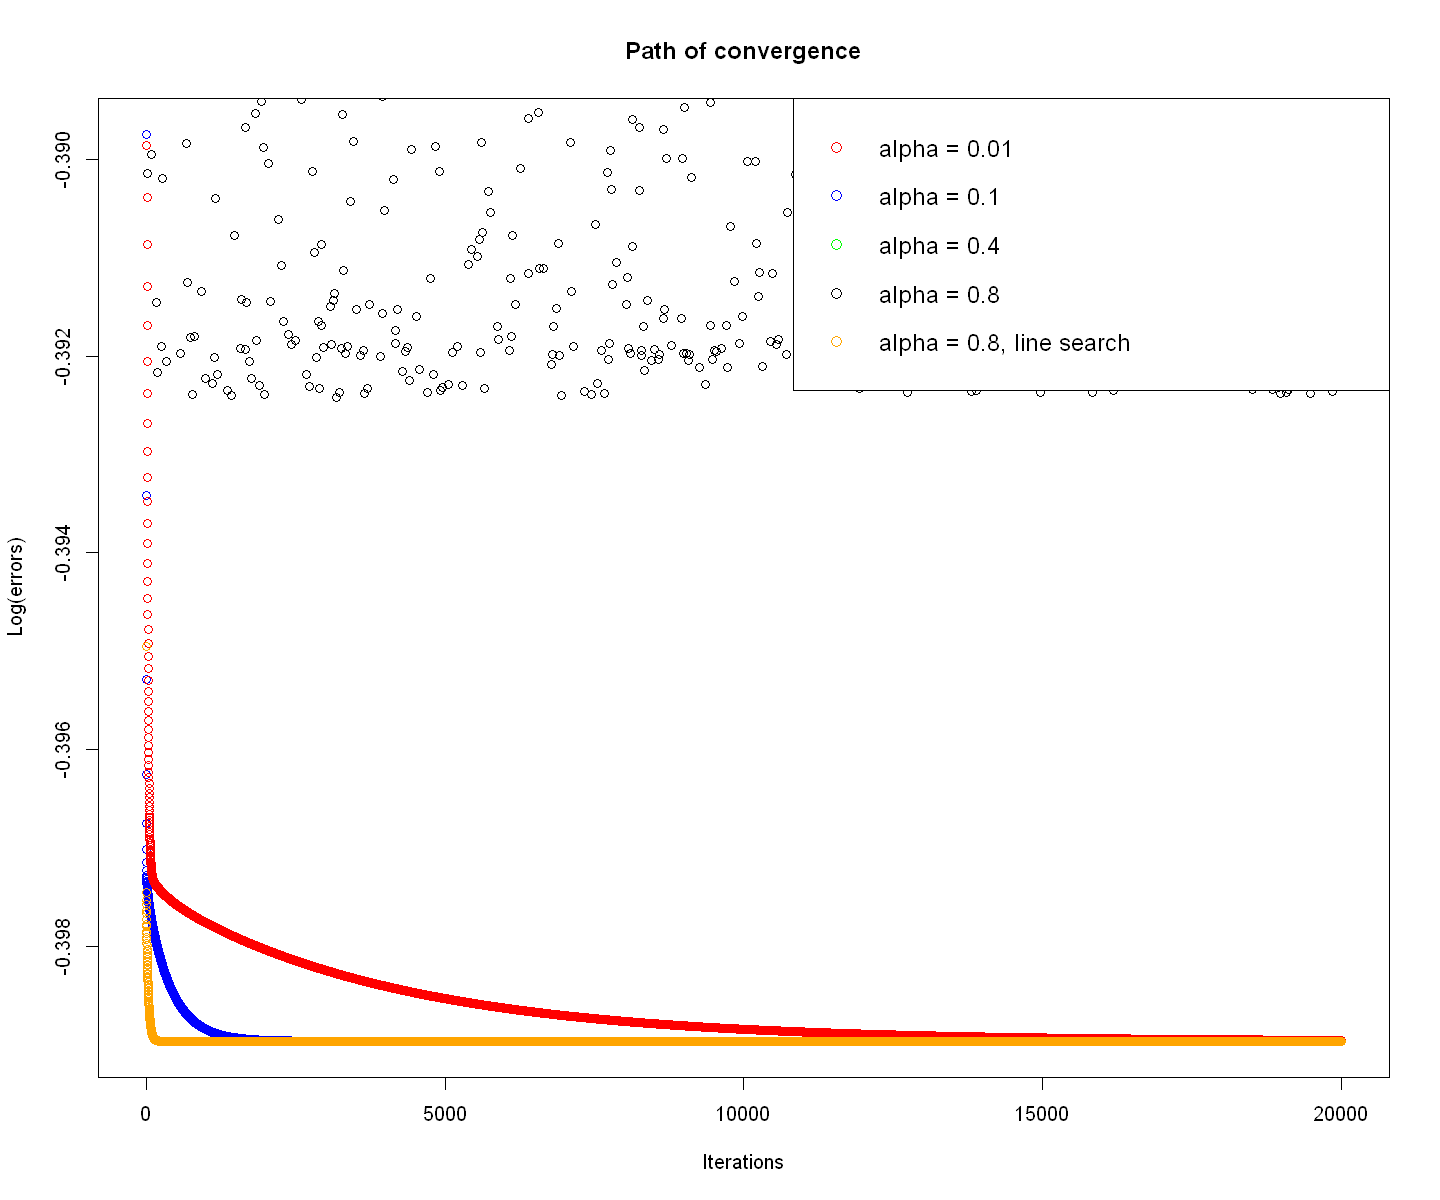

In [10]:
#Visualize the path of convergence.
plot(log(betalist01[[2]]), col = 'blue', main = 'Path of convergence', ylab = 'Log(errors)', xlab = 'Iterations')
points(log(betalist001[[2]]), col = 'red')
points(log(betalist04[[2]]), col = 'green')
points(log(betalist08[[2]]), col = 'black')
points(log(betalist_ls[[2]]), col = 'orange')
legend("topright", legend = c("alpha = 0.01", "alpha = 0.1", "alpha = 0.4", "alpha = 0.8", "alpha = 0.8, line search"),
       col = c("red", "blue", "green", "black", "orange"), bty = "o", pch = 1, cex = 1.2)

In the logistic regression case, gradient descent converges slowly when using a learning rate of $0.01$, although we can see that it is on the right track. The algorithm diverges when the learning rate is $0.4$, and it begins bouncing around if we further increase the learning rate to $0.8$. After trying out different rates, we find that $\alpha_t = 0.1$ works the best. However, if we include the time for testing various $\alpha_t$'s, line search with an initial $\alpha_t = 0.8$ takes the least amount of time to obtain the correct estimates.

## Test the algorithm for probit.

In [49]:
#Define the cost and gradient functions for probit.
probit_cost <- function(X, y, beta) {
    return(-mean(y*log(pnorm(X%*%beta)) + (1-y)*log(1-pnorm(X%*%beta))))
}

probit_gradient <- function(X, y, beta) {
    return(-t(X) %*% ((y-pnorm(X%*%beta))/(pnorm(X%*%beta)*(1-pnorm(X%*%beta)))*dnorm(X%*%beta)) / length(y))
}

In [12]:
builtin <- glm(y ~ x1 + x2 + x3 + x4, data = data, family = binomial(link = "probit"))
coef(builtin) %>% as.matrix()

(Intercept),0.2599022393
x1,0.0055922210
x2,-0.0197340040
x3,-0.0008900177
x4,0.0005318751


In [13]:
betalist001 <- gradient_descent(X, y, error_func = probit_cost, grad_func = probit_gradient)
betalist01 <- gradient_descent(X, y, alpha = 0.1, error_func = probit_cost, grad_func = probit_gradient)
betalist02 <- gradient_descent(X, y, alpha = 0.2, error_func = probit_cost, grad_func = probit_gradient)
betalist_ls <- gradient_descent(X, y, alpha = 0.2, linesearch = TRUE, linesearch_c = 0.3,
                                error_func = probit_cost, grad_func = probit_gradient)

display <- cbind(betalist001[[1]], betalist01[[1]], betalist02[[1]], betalist_ls[[1]])
colnames(display) <- c("alpha = 0.01", "alpha = 0.1", "alpha = 0.2", "alpha = 0.2, line search")
display

,alpha = 0.01,alpha = 0.1,alpha = 0.2,"alpha = 0.2, line search"
Intercept,0.2595536275,NaN,NaN,0.2599022390
x1,0.0055931789,NaN,NaN,0.0055922211
x2,-0.0197482465,NaN,NaN,-0.0197340041
x3,-0.0008111348,NaN,NaN,-0.0008900179
x4,0.0005295480,NaN,NaN,0.0005318755


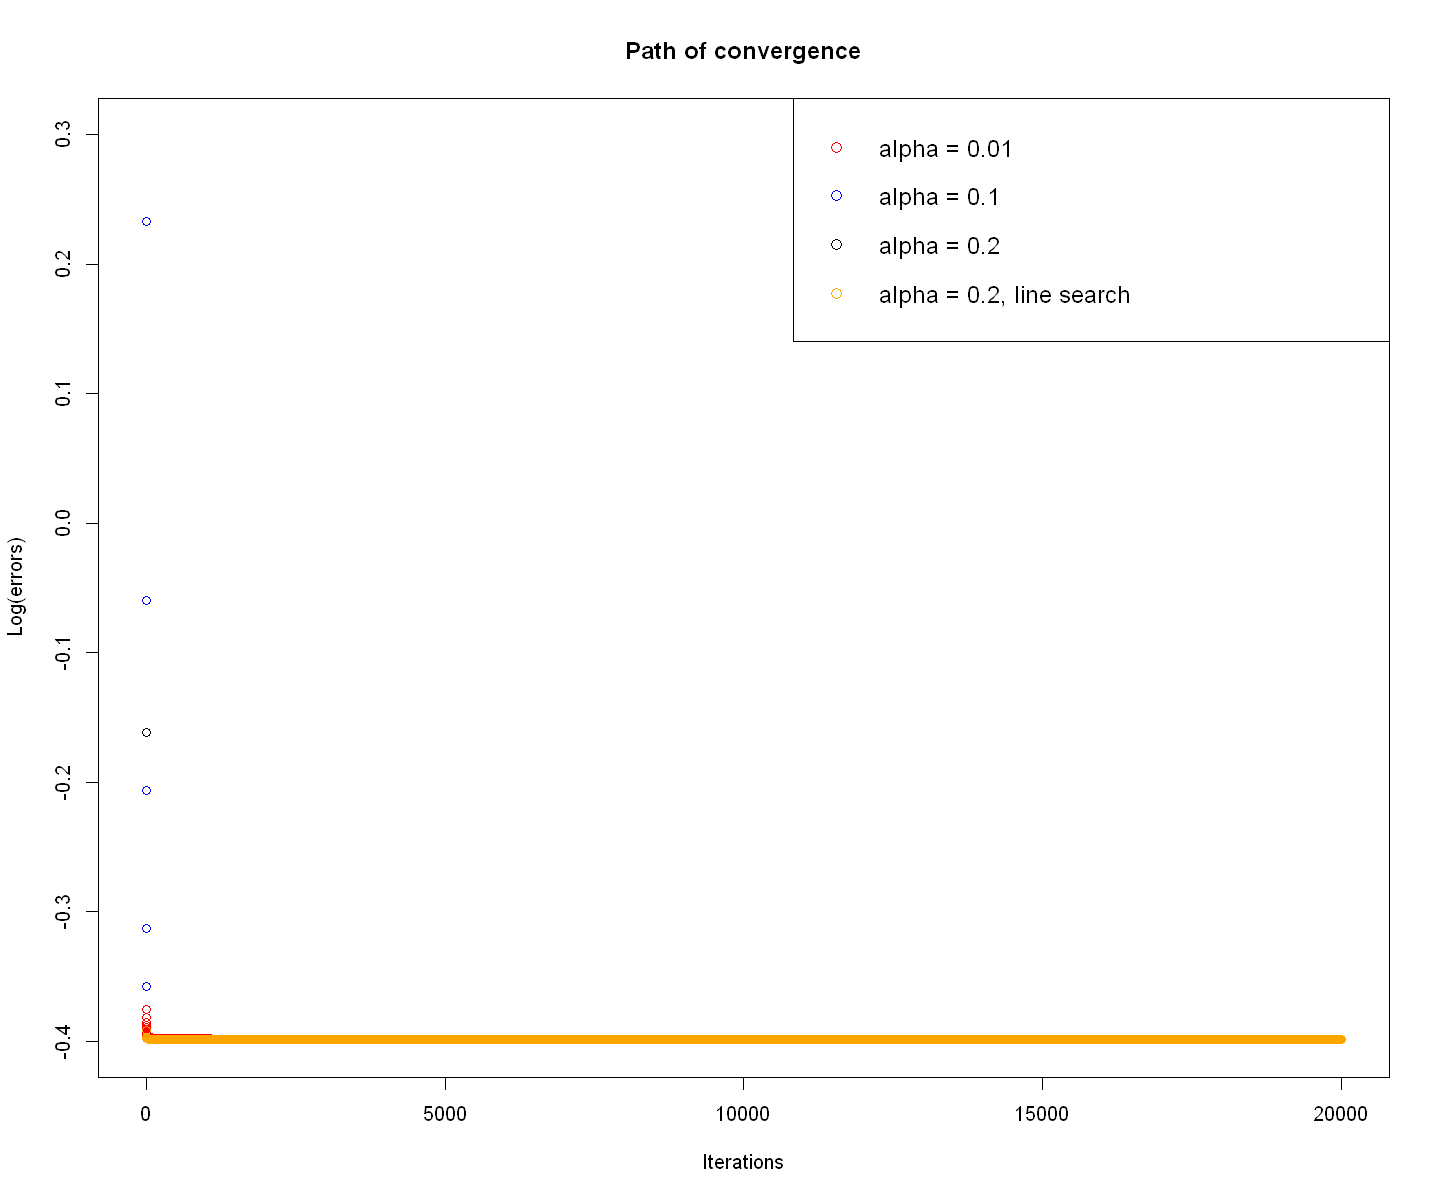

In [14]:
#Visualize the path of convergence.
plot(log(betalist01[[2]]), col = 'blue', main = 'Path of convergence', ylab = 'Log(errors)', xlab = 'Iterations',
     ylim = c(-0.4, 0.3))
points(log(betalist001[[2]]), col = 'red')
points(log(betalist02[[2]]), col = 'black')
points(log(betalist_ls[[2]]), col = 'orange')
legend("topright", legend = c("alpha = 0.01", "alpha = 0.1", "alpha = 0.2", "alpha = 0.2, line search"),
       col = c("red", "blue", "black", "orange"), bty = "o", pch = 1, cex = 1.2)

Compared with the logit model, gradient descent for probit suffers more from numeric overflow or underflow due to the way R computes the standard normal densities (easy to get $1$ or $0$). Consequently, a learning rate of $0.1$ appears to be large enough for the algorithm to diverge. We have to use a small $\alpha_t = 0.01$ to ensure convergence. When we have little prior knowledge about what learning rate to use, line search can still be useful in the probit case.

## Gradient descent might not work well with logit or probit models on economics data.
Here we try to apply the gradient descent algorithm to fit a logit and a probit model on the 1970s German creditworthiness data ($n = 1000$ creditors).

In [14]:
repayment <- read.csv("C:/Users/yanbo/OneDrive/Stanford MS&E 311 Optimization/repayment.csv")
X <- model.matrix(repaid ~ age + telephone + amount + duration, data = repayment)
y <- repayment$repaid

In [23]:
betalist <- gradient_descent(X, y, alpha = 0.000001, num_iters = 10^6, error_func = logit_cost, grad_func = logit_gradient)

In [24]:
betalist[[1]]

(Intercept),0.9988722695
age,0.0254300073
telephone,0.0157487997
amount,0.0008026525
duration,-0.0645674771


In [25]:
betalist[[2]]

[1] 0.7084261 1.0643169 0.8772104 1.2659337 0.7253335 1.0974308 0.8512506
    [8] 1.2478541 0.7377977 1.1190934 0.8342801 1.2342724 0.7473876 1.1343926
   [15] 0.8223501 1.2237803 0.7549179 1.1456553 0.8136138 1.2155558 0.7608898
   [22] 1.1541525 0.8070551 1.2090593 0.7656473 1.1606621 0.8020522 1.2039078
   [29] 0.7694438 1.1656985 0.7981956 1.1998158 0.7724740 1.1696207 0.7952012
   [36] 1.1965634 0.7748911 1.1726886 0.7928646 1.1939783 0.7768175 1.1750954
   [43] 0.7910350 1.1919242 0.7783513 1.1769876 0.7895988 1.1902928 0.7795713
   [50] 1.1784772 0.7884694 1.1889976 0.7805410 1.1796510 0.7875800 1.1879697
   [57] 0.7813111 1.1805766 0.7868791 1.1871541 0.7819223 1.1813066 0.7863264
   [64] 1.1865073 0.7824071 1.1818825 0.7858903 1.1859942 0.7827916 1.1823368
   [71] 0.7855462 1.1855872 0.7830965 1.1826950 0.7852746 1.1852644 0.7833381
   [78] 1.1829775 0.7850603 1.1850082 0.7835296 1.1832000 0.7848912 1.1848048
   [85] 0.7836814 1.1833751 0.7847579 1.1846432 0.7838018 1.1835129 0.7846527
   [92] 1.1845147 0.7838973 1.1836211 0.7845699 1.1844124 0.7839730 1.1837058
   [99] 0.7845047 1.1843308 0.7840332 1.1837722 0.7844534 1.1842656 0.7840810
  [106] 1.1838238 0.7844132 1.1842133 0.7841191 1.1838640 0.7843816 1.1841713
  [113] 0.7841494 1.1838950 0.7843569 1.1841374 0.7841737 1.1839188 0.7843377
  [120] 1.1841099 0.7841931 1.1839369 0.7843227 1.1840874 0.7842087 1.1839505
  [127] 0.7843112 1.1840690 0.7842212 1.1839605 0.7843023 1.1840538 0.7842314
  [134] 1.1839677 0.7842956 1.1840410 0.7842397 1.1839727 0.7842905 1.1840302
  [141] 0.7842466 1.1839760 0.7842868 1.1840210 0.7842522 1.1839778 0.7842841
  [148] 1.1840130 0.7842569 1.1839786 0.7842822 1.1840060 0.7842609 1.1839785
  [155] 0.7842810 1.1839997 0.7842643 1.1839777 0.7842803 1.1839941 0.7842672
  [162] 1.1839763 0.7842799 1.1839889 0.7842698 1.1839746 0.7842800 1.1839842
  [169] 0.7842721 1.1839725 0.7842802 1.1839797 0.7842741 1.1839701 0.7842807
  [176] 1.1839755 0.7842760 1.1839675 0.7842813 1.1839714 0.7842778 1.1839648
  [183] 0.7842821 1.1839675 0.7842794 1.1839619 0.7842829 1.1839637 0.7842809
  [190] 1.1839590 0.7842839 1.1839600 0.7842824 1.1839559 0.7842848 1.1839564
  [197] 0.7842838 1.1839528 0.7842859 1.1839528 0.7842852 1.1839496 0.7842870
  [204] 1.1839493 0.7842866 1.1839464 0.7842881 1.1839458 0.7842879 1.1839432
  [211] 0.7842892 1.1839423 0.7842892 1.1839399 0.7842903 1.1839389 0.7842904
  [218] 1.1839367 0.7842915 1.1839355 0.7842917 1.1839334 0.7842927 1.1839321
  [225] 0.7842930 1.1839301 0.7842938 1.1839287 0.7842942 1.1839267 0.7842950
  [232] 1.1839253 0.7842954 1.1839234 0.7842962 1.1839219 0.7842967 1.1839201
  [239] 0.7842974 1.1839186 0.7842979 1.1839168 0.7842986 1.1839152 0.7842991
  [246] 1.1839134 0.7842998 1.1839118 0.7843003 1.1839101 0.7843010 1.1839085
  [253] 0.7843015 1.1839067 0.7843022 1.1839051 0.7843028 1.1839034 0.7843034
  [260] 1.1839018 0.7843040 1.1839001 0.7843046 1.1838984 0.7843052 1.1838967
  [267] 0.7843058 1.1838951 0.7843064 1.1838934 0.7843070 1.1838917 0.7843076
  [274] 1.1838900 0.7843082 1.1838884 0.7843088 1.1838867 0.7843094 1.1838850
  [281] 0.7843100 1.1838833 0.7843106 1.1838817 0.7843112 1.1838800 0.7843118
  [288] 1.1838783 0.7843124 1.1838767 0.7843130 1.1838750 0.7843136 1.1838733
  [295] 0.7843142 1.1838716 0.7843148 1.1838700 0.7843154 1.1838683 0.7843160
  [302] 1.1838666 0.7843166 1.1838650 0.7843172 1.1838633 0.7843178 1.1838616
  [309] 0.7843184 1.1838599 0.7843190 1.1838583 0.7843196 1.1838566 0.7843202
  [316] 1.1838549 0.7843208 1.1838533 0.7843214 1.1838516 0.7843220 1.1838499
  [323] 0.7843226 1.1838482 0.7843232 1.1838466 0.7843238 1.1838449 0.7843244
  [330] 1.1838432 0.7843250 1.1838416 0.7843256 1.1838399 0.7843262 1.1838382
  [337] 0.7843268 1.1838366 0.7843274 1.1838349 0.7843280 1.1838332 0.7843286
  [344] 1.1838315 0.7843292 1.1838299 0.7843298 1.1838282 0.7843304 1.1838265
  [351] 0.7843310 1.1838249 0.7843316 1.1838232 0.7843322 1.1838215 0.7843328
  [358] 1.1838199 0.784333

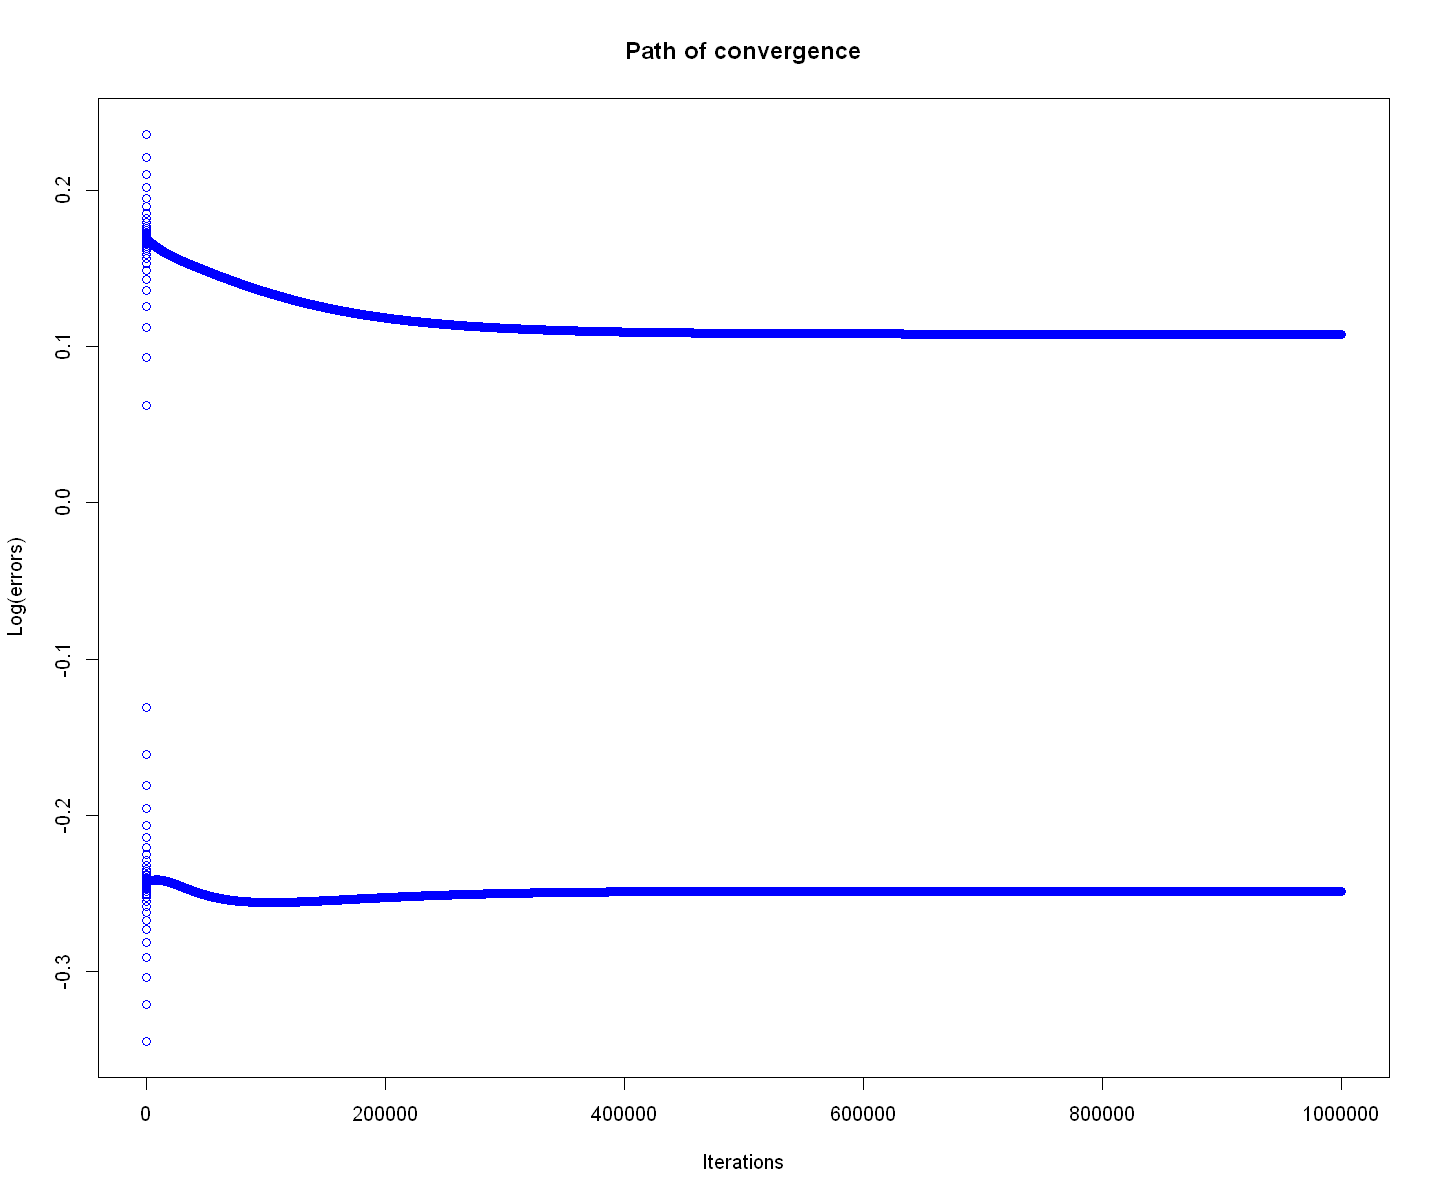

In [26]:
plot(log(betalist[[2]]), col = 'blue', main = 'Path of convergence', ylab = 'Log(errors)', xlab = 'Iterations')

### Try logit.

In [16]:
logit <- glm(repaid ~ age + telephone + amount + duration, data = repayment, family = binomial(link = "logit"))
betalist0001 <- gradient_descent(X, y, alpha = 0.001, error_func = logit_cost, grad_func = logit_gradient)
betalist001 <- gradient_descent(X, y, error_func = logit_cost, grad_func = logit_gradient)
betalist01 <- gradient_descent(X, y, alpha = 0.1, error_func = logit_cost, grad_func = logit_gradient)
betalist02 <- gradient_descent(X, y, alpha = 0.2, error_func = logit_cost, grad_func = logit_gradient)
opt <- optim(par = rep(0, ncol(X)), fn = logit_cost, gr = logit_gradient, y = y, X = X, method = "BFGS")

display <- cbind(coef(logit), opt$par, betalist0001[[1]], betalist001[[1]], betalist01[[1]], betalist02[[1]])
colnames(display) <- c("glm()", "optim(), BFGS", "alpha = 0.001", "alpha = 0.01", "alpha = 0.1", "alpha = 0.2")
display

,glm(),"optim(), BFGS",alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 0.2
(Intercept),1.003682766,1.00381596723,NaN,NaN,NaN,NaN
age,0.016736147,0.01674953954,NaN,NaN,NaN,NaN
telephone,0.336726184,0.33632523323,NaN,NaN,NaN,NaN
amount,-0.000045302,-0.00004526219,NaN,NaN,NaN,NaN
duration,-0.033050297,-0.03308053324,NaN,NaN,NaN,NaN


### Try probit.

In [17]:
probit <- glm(repaid ~ age + telephone + amount + duration, data = repayment, family = binomial(link = "probit"))
betalist0001 <- gradient_descent(X, y, alpha = 0.001, error_func = probit_cost, grad_func = probit_gradient)
betalist001 <- gradient_descent(X, y, error_func = probit_cost, grad_func = probit_gradient)
betalist01 <- gradient_descent(X, y, alpha = 0.1, error_func = probit_cost, grad_func = probit_gradient)
betalist02 <- gradient_descent(X, y, alpha = 0.2, error_func = probit_cost, grad_func = probit_gradient)
opt <- optim(par = rep(0, ncol(X)), fn = probit_cost, gr = probit_gradient, y = y, X = X, method = "BFGS")

display <- cbind(coef(probit), opt$par, betalist0001[[1]], betalist001[[1]], betalist01[[1]], betalist02[[1]])
colnames(display) <- c("glm()", "optim(), BFGS", "alpha = 0.001", "alpha = 0.01", "alpha = 0.1", "alpha = 0.2")
display

,glm(),"optim(), BFGS",alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 0.2
(Intercept),0.62832653262,0.61845846081,NaN,NaN,NaN,NaN
age,0.00988129226,0.00989370816,NaN,NaN,NaN,NaN
telephone,0.20658626188,0.20330306818,NaN,NaN,NaN,NaN
amount,-0.00002915846,-0.00002866031,NaN,NaN,NaN,NaN
duration,-0.02001453860,-0.01972733973,NaN,NaN,NaN,NaN


In [57]:
#Define the cost and gradient functions for probit.
probit_cost <- function(X, y, beta) {
    return(-mean(y*log(pnorm(X%*%beta)) + (1-y)*log(1-pnorm(X%*%beta))))
}

probit_gradient <- function(X, y, beta) {
    return(-t(X) %*% ((y-pnorm(X%*%beta))/(pnorm(X%*%beta)*(1-pnorm(X%*%beta)))*dnorm(X%*%beta)) / length(y))
}

In [58]:
probit_cost(X, y, beta = rep(0,5))
probit_gradient(X, y, beta = rep(0,5))

[1] 693.1472

(Intercept),-319.1538
age,-12100.7172
telephone,-142.0235
amount,-724775.9943
duration,-4776.9349


In [59]:
betalist <- gradient_descent(X, y, alpha = 0.000001, num_iters = 10^6, error_func = probit_cost, grad_func = probit_gradient)

In [60]:
betalist[[1]]

(Intercept),NaN
age,NaN
telephone,NaN
amount,NaN
duration,NaN


In [61]:
betalist[[2]]

[1] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   [19] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   [37] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   [55] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   [73] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   [91] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [109] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [127] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [145] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [163] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [181] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [199] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [217] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [235] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [253] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [271] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [289] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [307] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [325] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [343] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [361] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [379] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [397] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [415] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [433] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [451] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [469] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [487] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [505] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [523] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [541] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [559] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [577] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [595] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [613] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [631] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [649] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [667] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [685] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [703] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [721] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [739] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [757] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [775] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [793] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [811] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [829] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [847] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [865] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [883] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
  [9

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'ylim' values


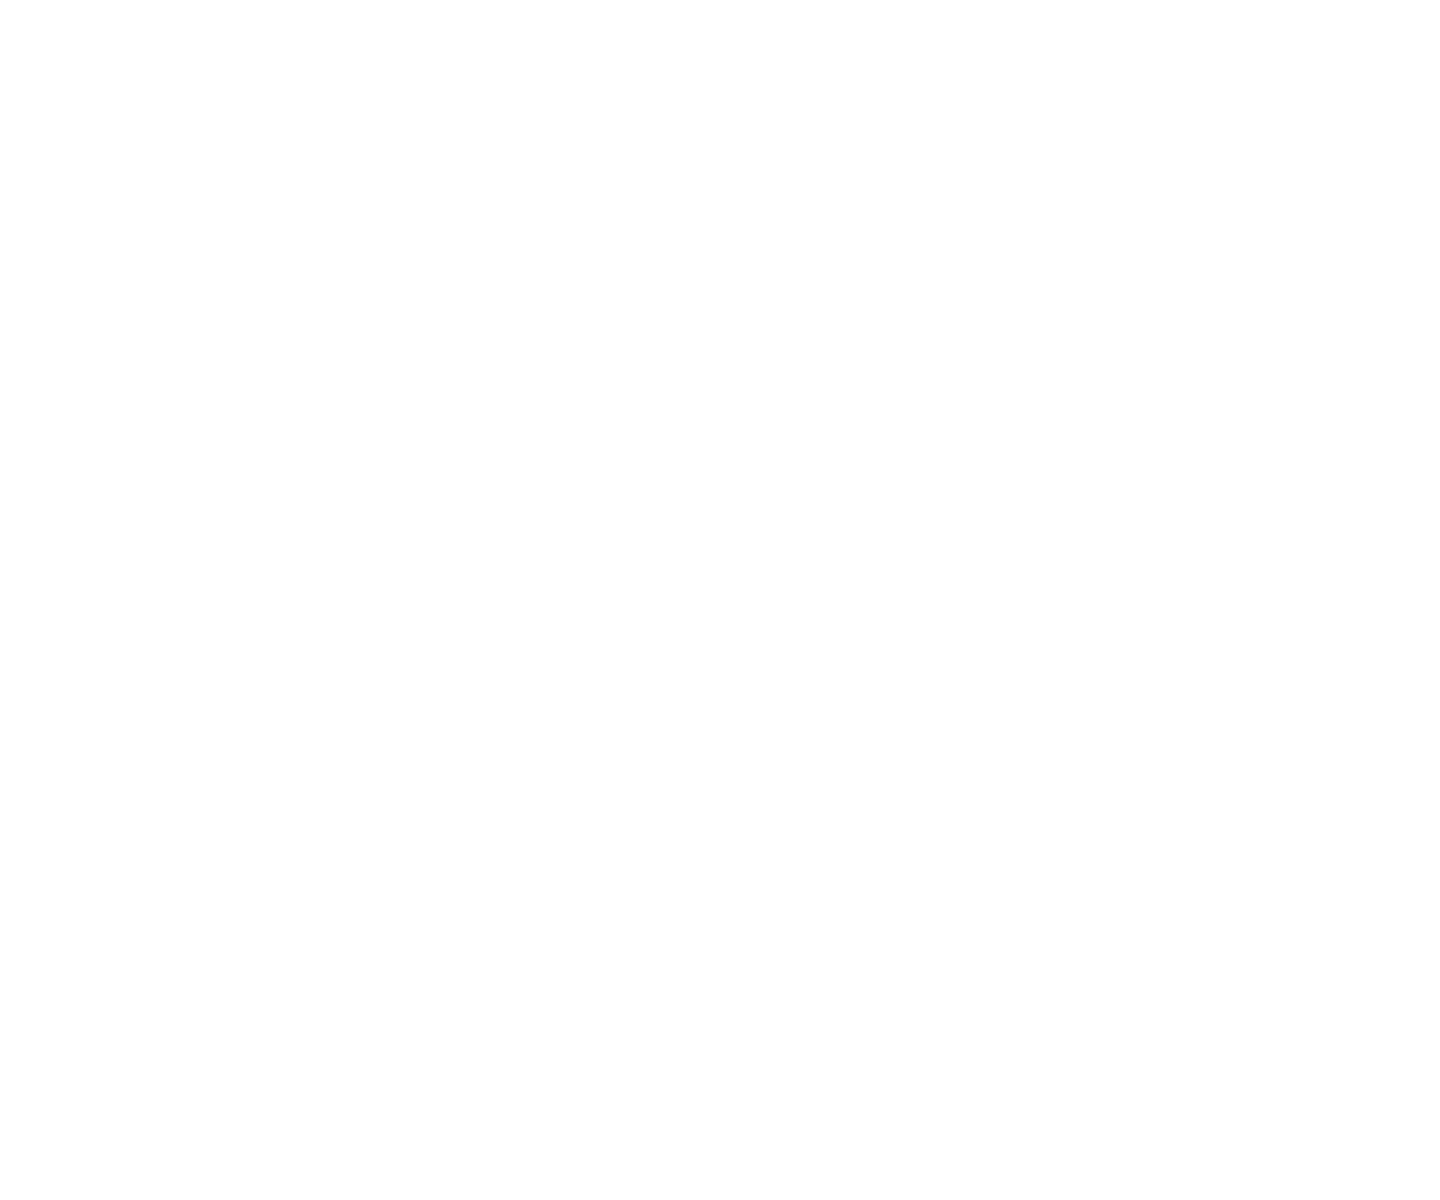

In [30]:
plot(log(betalist[[2]]), col = 'blue', main = 'Path of convergence', ylab = 'Log(errors)', xlab = 'Iterations')